In [7]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt



In [8]:
# Définition des constantes

h = sp.symbols('h', positive=True)
PlanckConstant=6.626e-34

hbar = sp.symbols('hbar', positive=True)
PlanckConstantReduced=PlanckConstant/(2*math.pi)

k_B = sp.symbols('k_B', positive=True)
BoltzmannConstant=1.38e-23

c = sp.symbols('c', positive=True)
LightCelerity=299792458.0 # m/s



# 1.1 Planck's Law of Black Body Radiation

## 1.1.1 Quantization of Enerygy

La relation de Planck est donnée par:
$$E = h \nu = \hbar \omega$$
où 

- $E$ est l'énergie du photon en J (joule) $[M.L^2.T^{-2}]$
- $h$ est la constante de Planck en Js (joule seconde) $[M.L^2.T^{-1}]$: $h=6.626*10^{-34}Js$
- $\nu$ est la fréquence en Hz (hertz) $[T^{-1}]$ de l'onde électromagnétique associée au photon considéré
- $\omega$ est la fréquence angulaire en Hz (hertz): $\omega = 2 \pi \nu$
- $\hbar$ est la constante de Planck réduite: $\hbar=\frac{h}{2\pi}=1.054*10^{-34}Js$





In [9]:
# Définition des variables

E = sp.symbols('E', positive=True)

ω = sp.symbols('ω', positive=True)
𝜆 = sp.symbols('𝜆', positive=True)
ν = sp.symbols('ν', positive=True)


Pour raisonner en terme de longueur d'onde, on écrit que $\nu = \frac{c}{\lambda}$

où:
- $c$ est la célérité de la lumière dans le vide en m/s (mètre par seconde) $[L.T^{-1}]$: $c = 299 792 458 m/s$
- $\lambda$ est la longueur d'onde en mètre $[L]$

Et l'équation donnant l'énergie s'écrit alors:
$$E = \frac{h.c}{\lambda}$$

Pour raisonner en terme de terme de quantité de mouvement ou d'impulsion on écrit que $\lambda = \frac{h}{p}$

où:
- $\lambda$ est la longueur d'onde en mètre $[L]$
- $p$ est la quantité de mouvement (ou impulsion) en kg.m/s (ou N s) $[M.L^2.T^{-2}]$

L'impulsion d'un photon s'écrit alors:
$$ p = \frac{h.v}{c} = \frac{E}{c} $$

In [10]:



# x, L = sp.symbols('x L', real=True)
# omega = sp.symbols('omega', positive=True)
# lambda = sp.symbols('lambda', positive=True)



In [11]:

NRJ = h*ν 
A=NRJ.subs(ν, c/λ)
B=A.evalf(subs={c: LightCelerity, h: PlanckConstant})
# Convertir en fonction Python
NRJ_func = sp.lambdify(λ, B, 'numpy')



Ondes radio: λ = 1.0e+03 m → E = 1.99e-28 J
Micro-ondes: λ = 1.0e-02 m → E = 1.99e-23 J
Infrarouge: λ = 1.0e-06 m → E = 1.99e-19 J
Lumière visible: λ = 5.0e-07 m → E = 3.97e-19 J
Ultraviolet: λ = 1.0e-08 m → E = 1.99e-17 J
Rayons X: λ = 1.0e-10 m → E = 1.99e-15 J
Rayons gamma: λ = 1.0e-12 m → E = 1.99e-13 J


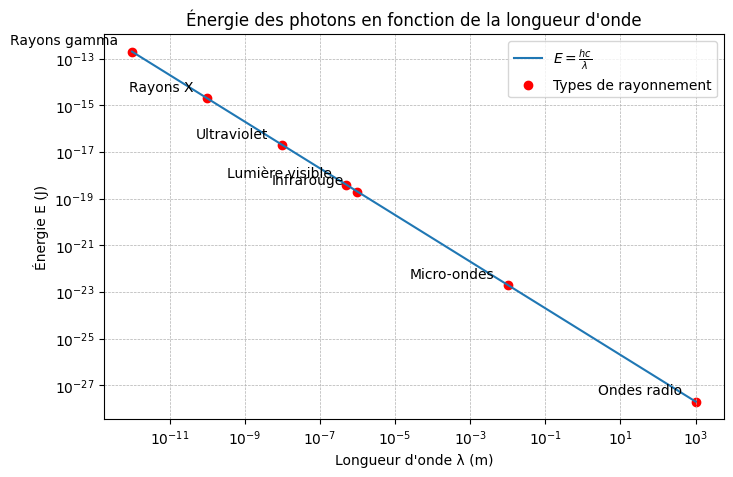

In [12]:
# Définition des longueurs d'onde (en mètres) pour différents types de rayonnement
wavelengths = {
    "Ondes radio": 1e3,       # 1 km
    "Micro-ondes": 1e-2,      # 1 cm
    "Infrarouge": 1e-6,       # 1 µm
    "Lumière visible": 500e-9, # 500 nm (vert)
    "Ultraviolet": 1e-8,      # 10 nm
    "Rayons X": 1e-10,        # 0.1 nm
    "Rayons gamma": 1e-12     # 0.001 nm
}

# Calcul des énergies correspondantes
for name, λ_val in wavelengths.items():
    E_val = NRJ_func(λ_val)
    print(f"{name}: λ = {λ_val:.1e} m → E = {E_val:.2e} J")

# Tracé de E(λ) sur une large plage
λ_values = np.logspace(-12, 3, 100)  # De 1 pm à 1 km
E_values = NRJ_func(λ_values)

plt.figure(figsize=(8, 5))
plt.loglog(λ_values, E_values, label=r"$E = \frac{h c}{\lambda}$")
plt.scatter(wavelengths.values(), [NRJ_func(λ) for λ in wavelengths.values()], color='red', label="Types de rayonnement")

# Annotation des différents rayonnements
for name, λ_val in wavelengths.items():
    plt.annotate(name, (λ_val, NRJ_func(λ_val)), textcoords="offset points", xytext=(-10,5), ha='right')

plt.xlabel("Longueur d'onde λ (m)")
plt.ylabel("Énergie E (J)")
plt.title("Énergie des photons en fonction de la longueur d'onde")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
## 1.1.2 Black Body Radiation

La loi de Planck :
    
$$ u(w) = \frac{\hbar}{\pi^2c^3}\frac{\omega^3}{exp(\frac{\hbar\omega}{kT})-1} $$

où:
- $k_B$ est la constante de Boltzmann en joule par kelvin $[M.L^2.T^{-2}.Θ^{-1}]$ . $k = 1.38x10^{-23} JK^{-1}$
- $T$ est la température en degré kelvin $[Θ]$



La luminance énergétique spectrale:

$$ L(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{exp(\frac{h\nu}{k_B.T})-1} $$

où:
- $k_B$ est la constante de Boltzmann en joule par kelvin $[M.L^2.T^{-2}.Θ^{-1}]$ . $k = 1.38x10^{-23} JK^{-1}$
- $T$ est la température en degré kelvin $[Θ]$


In [28]:
#import sympy as sp

T = sp.symbols('T', positive=True)
L = sp.symbols('T', positive=True)

# Définition des variables
# nu, T = sp.symbols('nu T', positive=True, real=True)  # Fréquence et température
# h, c, k_B = sp.symbols('h c k_B', positive=True)  # Constantes physiques

# Expression de la loi de Planck
L_nu_T = ((2 * h * ν**3) / (c**2)) * ( 1 / (sp.exp(h * ν / (k_B * T)) - 1) )

# Affichage de la loi de Planck
print("Loi de Planck pour le rayonnement du corps noir :")
sp.pprint(L_nu_T)

L_lambda_T = L_nu_T.subs(ν, c/λ)
sp.pprint(L_lambda_T)


Loi de Planck pour le rayonnement du corps noir :
          3    
     2⋅h⋅ν     
───────────────
   ⎛  h⋅ν     ⎞
   ⎜ ─────    ⎟
 2 ⎜ T⋅k_B    ⎟
c ⋅⎝ℯ      - 1⎠
      2⋅c⋅h      
─────────────────
   ⎛   c⋅h      ⎞
   ⎜ ───────    ⎟
 3 ⎜ T⋅k_B⋅𝜆    ⎟
𝜆 ⋅⎝ℯ        - 1⎠


In [31]:
L_lambda_T.evalf(subs={c: LightCelerity, h: PlanckConstant, k_B: BoltzmannConstant})
sp.pprint(L_lambda_T)

      2⋅c⋅h      
─────────────────
   ⎛   c⋅h      ⎞
   ⎜ ───────    ⎟
 3 ⎜ T⋅k_B⋅𝜆    ⎟
𝜆 ⋅⎝ℯ        - 1⎠


In [47]:
#B=L_lambda_T.evalf(subs={c: LightCelerity, h: PlanckConstant, k_B: BoltzmannConstant})


# Convertir en fonction Python
luminance = sp.lambdify((λ, T)
                        ,L_lambda_T.evalf(subs={c: LightCelerity, h: PlanckConstant, k_B: BoltzmannConstant})
                        ,'numpy')
λ_values = np.logspace(-7, -6, 100)  # De 1 pm à 1 km
# E_values = luminance(λ_values)
T_values = np.full_like(λ_values, 5000)
# E_values = luminance(18, 5000) #velengths["Ultraviolet"]
# E_values = luminance(λ_values, T_values)

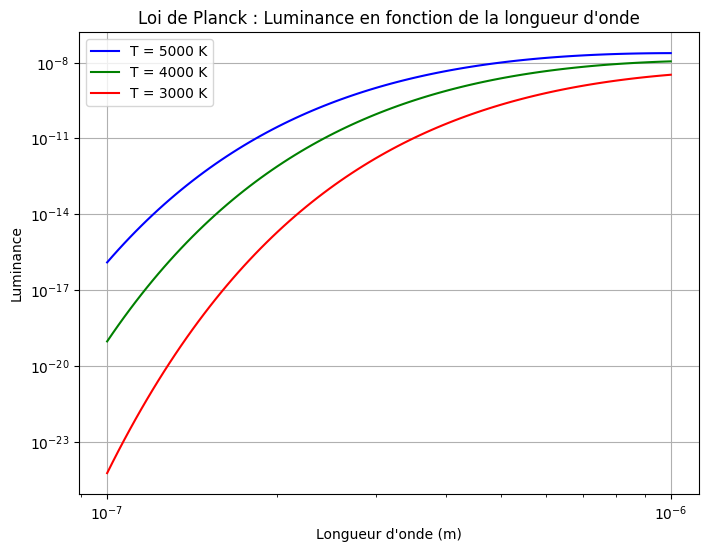

In [49]:
plt.figure(figsize=(8, 6))

# Températures à afficher
temperatures = [5000, 4000, 3000]  # En Kelvin
colors = ['blue', 'green', 'red']  # Couleurs associées


for T_val, color in zip(temperatures, colors):
    T_values = np.full_like(λ_values, T_val)  # Tableau de température constante
    E_values = luminance(λ_values, T_values)  # Calcul de la luminance
    plt.plot(λ_values, E_values, label=f"T = {T_val} K", color=color)  # λ en nm

# Configuration du graphique
plt.xscale("log")  # Échelle logarithmique pour λ
plt.yscale("log")  # Échelle logarithmique pour la luminance
plt.xlabel("Longueur d'onde (m)")
plt.ylabel("Luminance")
plt.title("Loi de Planck : Luminance en fonction de la longueur d'onde")
plt.legend()
plt.grid(True)


In [52]:
PlanckConstant
PlanckConstantReduced

1.0545606529268985e-34

In [ ]:
psi = sp.Function('psi')(x)

$$i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r},t) = \left[ -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{r},t) \right] \Psi(\mathbf{r},t)$$

In [41]:
# Équation de Schrödinger générale
schrodinger_eq = lambda V: sp.Eq(- (hbar**2 / (2*m)) * psi.diff(x, x) + V * psi, E * psi)



In [17]:
from IPython.display import display, Math

math_schrodinger_eq = r"i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r},t) = \left[ -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{r},t) \right] \Psi(\mathbf{r},t)"
display(Math(math_schrodinger_eq))

<IPython.core.display.Math object>

In [10]:
# 1. Particule libre (V = 0)
V_free = 0
eq_free = schrodinger_eq(V_free)
sol_free = sp.dsolve(eq_free, psi)
print("\nSolution pour la particule libre :")
sp.pprint(sol_free)




Solution pour la particule libre :
             ⎛√2⋅√E⋅√m⋅x⎞         ⎛√2⋅√E⋅√m⋅x⎞
ψ(x) = C₁⋅sin⎜──────────⎟ + C₂⋅cos⎜──────────⎟
             ⎝    h̅    ⎠         ⎝    h̅    ⎠


In [11]:
# 2. Puits de potentiel infini (0 < x < L)
# On impose les conditions aux limites: ψ(0) = 0 et ψ(L) = 0
V_well = 0
eq_well = schrodinger_eq(V_well)
sol_well = sp.dsolve(eq_well, psi)
print("\nSolution pour le puit :")
sp.pprint(sol_well)




Solution pour le puit :
             ⎛√2⋅√E⋅√m⋅x⎞         ⎛√2⋅√E⋅√m⋅x⎞
ψ(x) = C₁⋅sin⎜──────────⎟ + C₂⋅cos⎜──────────⎟
             ⎝    h̅    ⎠         ⎝    h̅    ⎠


In [12]:
C1, C2 = sp.symbols('C1 C2')  # Constantes de la solution générale
psi_well = sol_well.rhs.subs({C1: sp.sin(sp.sqrt(2*m*E)/hbar * x), C2: 0})  # Solution physique
print("\nSolution pour le puits de potentiel infini :")
sp.pprint(psi_well)



Solution pour le puits de potentiel infini :
   2⎛√2⋅√E⋅√m⋅x⎞
sin ⎜──────────⎟
    ⎝    h̅    ⎠


In [7]:
# 3. Oscillateur harmonique quantique (V = (1/2) m omega^2 x^2)
V_harmonic = (1/2) * m * omega**2 * x**2
eq_harmonic = schrodinger_eq(V_harmonic)
sol_harmonic = sp.dsolve(eq_harmonic, psi)
print("\nSolution pour l'oscillateur harmonique quantique :")
sp.pprint(sol_harmonic)

RecursionError: maximum recursion depth exceeded

In [14]:
import sympy as sp

# Définition des variables
x = sp.Symbol('x', real=True)
hbar, m, omega = sp.symbols('hbar m omega', positive=True)
n = sp.symbols('n', integer=True, positive=True)

# Longueur caractéristique du problème
x0 = sp.sqrt(hbar / (m * omega))

# Solution en termes de polynômes d'Hermite
Hermite_n = sp.hermite(n, x / x0)  # Polynôme d'Hermite

# Fonction d'onde normalisée
psi_n = sp.exp(-x**2 / (2 * x0**2)) * Hermite_n
psi_n = sp.simplify(psi_n)

# Énergie quantifiée
E_n = (n + 1/2) * hbar * omega

# Affichage des résultats
print("\nSolution de l'oscillateur harmonique quantique :")
print(f"ψ_n(x) = {psi_n}")
print(f"E_n = {E_n}")



Solution de l'oscillateur harmonique quantique :
ψ_n(x) = exp(-m*omega*x**2/(2*hbar))*hermite(n, sqrt(m)*sqrt(omega)*x/sqrt(hbar))
E_n = hbar*omega*(n + 0.5)


Ondes radio: λ = 1.0e+03 m → E = 1.99e-28 J
Micro-ondes: λ = 1.0e-02 m → E = 1.99e-23 J
Infrarouge: λ = 1.0e-06 m → E = 1.99e-19 J
Lumière visible: λ = 5.0e-07 m → E = 3.97e-19 J
Ultraviolet: λ = 1.0e-08 m → E = 1.99e-17 J
Rayons X: λ = 1.0e-10 m → E = 1.99e-15 J
Rayons gamma: λ = 1.0e-12 m → E = 1.99e-13 J


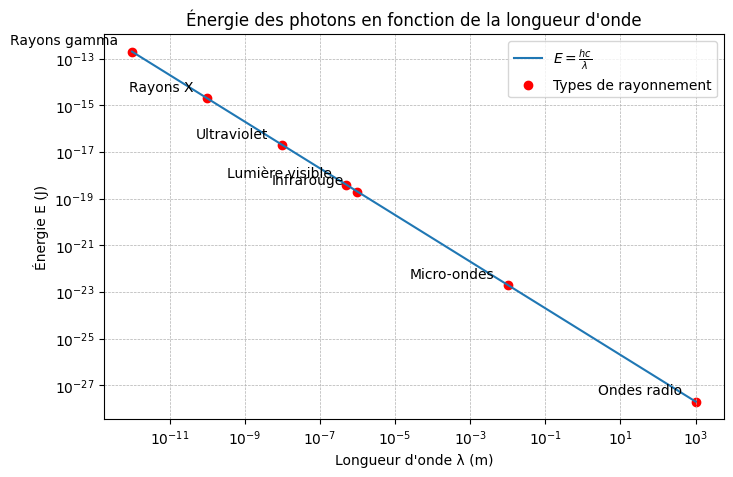

In [2]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

# Définition des constantes physiques
h = 6.626e-34  # Constante de Planck (J·s)
c = 299792458  # Vitesse de la lumière (m/s)

# Définition de la variable symbolique
λ = sp.symbols('λ', positive=True)

# Expression de l'énergie en fonction de λ
NRJ_expr = h * c / λ

# Convertir en fonction Python
NRJ_func = sp.lambdify(λ, NRJ_expr, 'numpy')

# Définition des longueurs d'onde (en mètres) pour différents types de rayonnement
wavelengths = {
    "Ondes radio": 1e3,       # 1 km
    "Micro-ondes": 1e-2,      # 1 cm
    "Infrarouge": 1e-6,       # 1 µm
    "Lumière visible": 500e-9, # 500 nm (vert)
    "Ultraviolet": 1e-8,      # 10 nm
    "Rayons X": 1e-10,        # 0.1 nm
    "Rayons gamma": 1e-12     # 0.001 nm
}

# Calcul des énergies correspondantes
for name, λ_val in wavelengths.items():
    E_val = NRJ_func(λ_val)
    print(f"{name}: λ = {λ_val:.1e} m → E = {E_val:.2e} J")

# Tracé de E(λ) sur une large plage
λ_values = np.logspace(-12, 3, 100)  # De 1 pm à 1 km
E_values = NRJ_func(λ_values)

plt.figure(figsize=(8, 5))
plt.loglog(λ_values, E_values, label=r"$E = \frac{h c}{\lambda}$")
plt.scatter(wavelengths.values(), [NRJ_func(λ) for λ in wavelengths.values()], color='red', label="Types de rayonnement")

# Annotation des différents rayonnements
for name, λ_val in wavelengths.items():
    plt.annotate(name, (λ_val, NRJ_func(λ_val)), textcoords="offset points", xytext=(-10,5), ha='right')

plt.xlabel("Longueur d'onde λ (m)")
plt.ylabel("Énergie E (J)")
plt.title("Énergie des photons en fonction de la longueur d'onde")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
